In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Lambda

from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Number of datapoints: 8036
107
Images: 107
Sample image
Image shape:  (160, 320, 3)


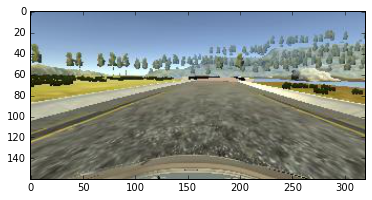

In [5]:
# Option D: reduced Udacity's dataset

## Import data
# Added header row manually to CSV.
driving_csv = pd.read_csv("data-udacity/driving_log.csv")

# Examine data
print("Number of datapoints: %d" % len(driving_csv))
driving_csv.head()

greater_half = driving_csv[driving_csv["steering"] > 0.5]
greater_half_neg = driving_csv[driving_csv["steering"] < -0.5]

smaller_dataset = pd.concat([greater_half, greater_half_neg])

i = -0.5
while i < 0.5:
    smaller_dataset = pd.concat([smaller_dataset, 
              driving_csv[driving_csv["steering"] > i].sort_values(by="steering").iloc[0:3]])
    i += 0.05
print(len(smaller_dataset))

# Extract centre image and steering angle from table
# Format: X_path: centre image name, y: steeringa angle
X_path = [smaller_dataset.iloc[i]["center"] \
              for i in range(len(smaller_dataset))]
y = [smaller_dataset.iloc[i]["steering"] \
              for i in range(len(smaller_dataset))]

# Import images
X_images = [mpimg.imread("data-udacity/" + image_path) for image_path in X_path]

# View image
print("Images: %d" % len(X_images))
print("Sample image")
plt.imshow(X_images[0])
# X_images[0]

imshape = X_images[0].shape
print("Image shape: ", imshape)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.1, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
# Convolutional model

model = Sequential()

# Normalise data
model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(imshape[0], imshape[1], 3)))

model.add(Convolution2D(24, 5, 5, border_mode='same',
                        input_shape=(160,320,3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

# Compile model
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.0001)
model.compile(loss='mean_squared_error',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
# Train model
batch_size = 5
nb_epoch = 10
data_augmentation = True

model.fit(X_train, y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_split=0.1,
              # validation_data=(X_test, y_test),
              shuffle=True)

Train on 86 samples, validate on 10 samples
Epoch 1/10


In [17]:
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
